In [ ]:
#@title Import Data and create a GeoDataFrame
%pip install geopandas folium mapclassify contextily
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas.tools import sjoin
from shapely.geometry import Point

#create the dataframe
housing_df = pd.read_csv("https://raw.githubusercontent.com/oceanofperceptions/tiktok/main/housing.csv")

#create a geometry column for geopandas
housing_df['geometry'] = [Point(xy) for xy in zip(housing_df['longitude'], housing_df['latitude'])]

#create the geodataframe
#crs specifies the coordiante projection being used
housing_gdf_lat = gpd.GeoDataFrame(housing_df, crs='EPSG:4326')
housing_gdf = housing_gdf_lat.to_crs(epsg=3857)


In [ ]:
housing_gdf.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,geometry
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,POINT (-13606581.360 4562487.679)
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,POINT (-13605468.165 4559667.342)
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,POINT (-13607694.555 4558257.461)
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,POINT (-13608807.749 4558257.461)
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,POINT (-13608807.749 4558257.461)


<Axes: >

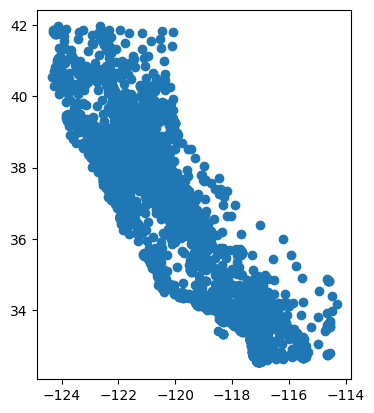

In [ ]:
housing_gdf_lat.plot()

In [ ]:
housing_gdf.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'geometry'],
      dtype='object')

Text(0.5, 1.0, 'median_house_value')

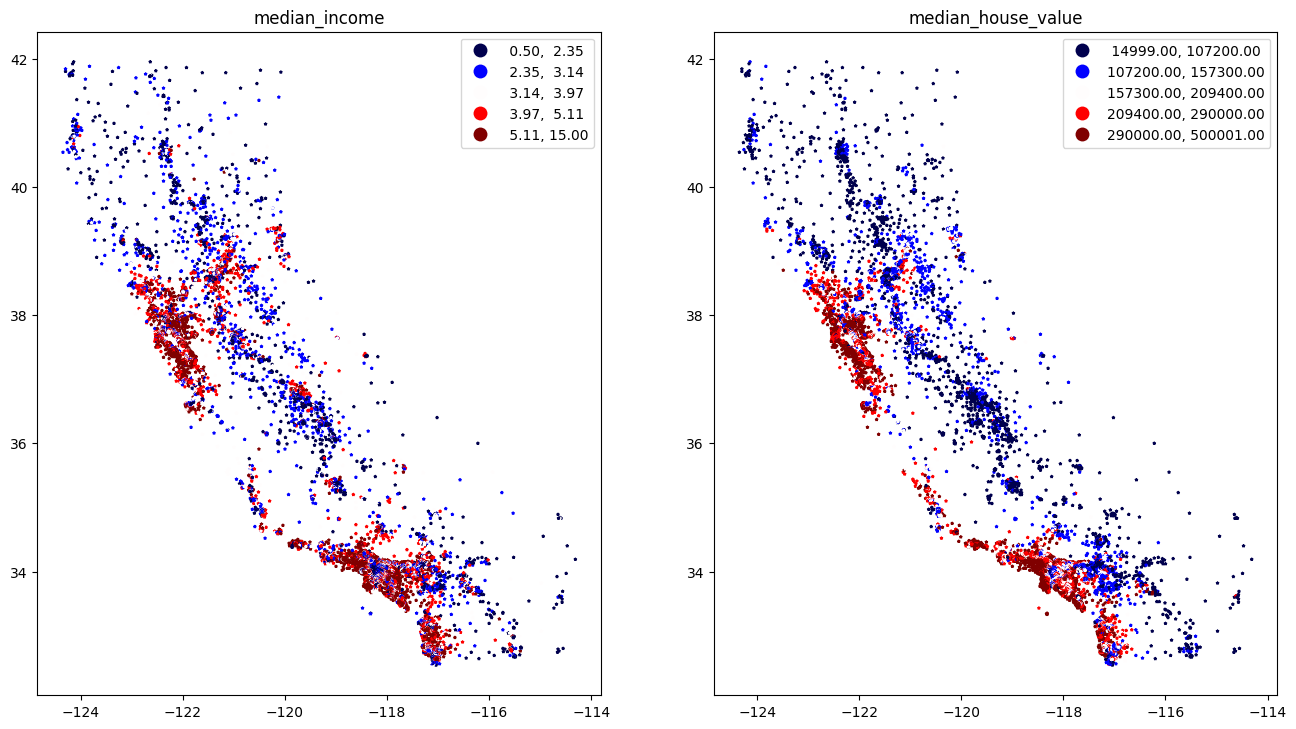

In [ ]:
#@title Look for Correlations and Associations

Left_Map_Variable = "median_income" #@param ['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value', 'ocean_proximity']
Left_Color_Map = "seismic" #@param ['seismic', 'viridis', 'Paired']


Right_Map_Variable = "median_house_value" #@param ['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value']
Right_Color_Map = "seismic" #@param ['seismic', 'viridis', 'Paired']

Number_of_Quantiles = 5 #@param {type:"integer"}


#geodataframes have a builtin plotting method that makes it easy to visualize geospatial data

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,11))

if Left_Map_Variable == "ocean_proximity":
  housing_gdf_lat.plot(column=Left_Map_Variable, cmap='Paired', markersize=3, marker='*', legend = True, ax=ax1)
  ax1.set_title(Left_Map_Variable)
else:
  housing_gdf_lat.plot(column=Left_Map_Variable, cmap=Left_Color_Map, markersize=3, marker='*', legend = True, ax=ax1, scheme = 'quantiles', k = Number_of_Quantiles)
  ax1.set_title(Left_Map_Variable)

housing_gdf_lat.plot(column=Right_Map_Variable, cmap=Right_Color_Map, markersize=3, marker='*',legend = True, ax=ax2, scheme = 'quantiles', k = Number_of_Quantiles)
ax2.set_title(Right_Map_Variable)


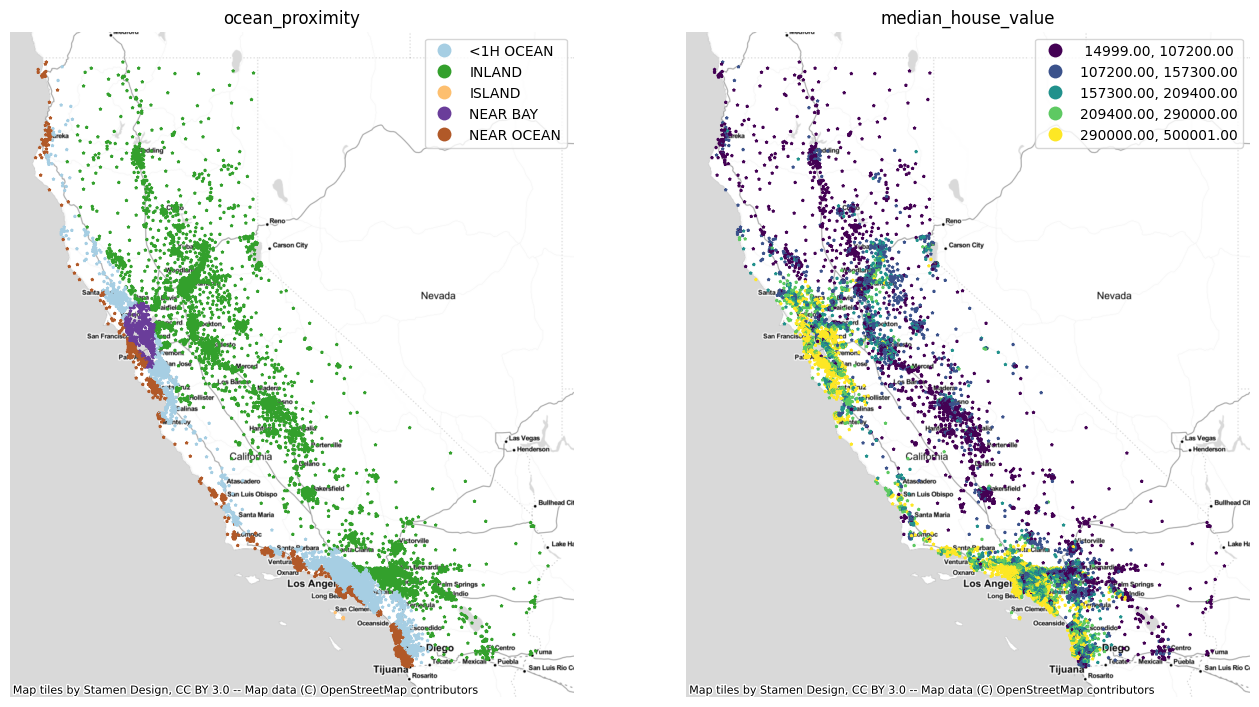

In [ ]:
#@title Look for Correlations and Associations with basemaps

import contextily as ctx


Left_Map_Variable = "ocean_proximity" #@param ['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value', 'ocean_proximity']
Left_Color_Map = "Paired" #@param ['seismic', 'viridis', 'Paired']


Right_Map_Variable = "median_house_value" #@param ['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value']
Right_Color_Map = "viridis" #@param ['seismic', 'viridis', 'Paired']

Number_of_Quantiles = 5 #@param {type:"integer"}


#geodataframes have a builtin plotting method that makes it easy to visualize geospatial data

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,11))

if Left_Map_Variable == "ocean_proximity":
  housing_gdf.plot(column=Left_Map_Variable, cmap='Paired', markersize=3, marker='*', legend = True, ax=ax1)
  ax1.set_title(Left_Map_Variable)
else:
  housing_gdf.plot(column=Left_Map_Variable, cmap=Left_Color_Map, markersize=3, marker='*', legend = True, ax=ax1, scheme = 'quantiles', k = Number_of_Quantiles)
  ax1.set_title(Left_Map_Variable)

ax1.set_axis_off()
ctx.add_basemap(ax1, source = 'Stamen TonerLite')

housing_gdf.plot(column=Right_Map_Variable, cmap=Right_Color_Map, markersize=3, marker='*',legend = True, ax=ax2, scheme = 'quantiles', k = Number_of_Quantiles)
ax2.set_title(Right_Map_Variable)
ax2.set_axis_off()
ctx.add_basemap(ax2, source = 'Stamen TonerLite')

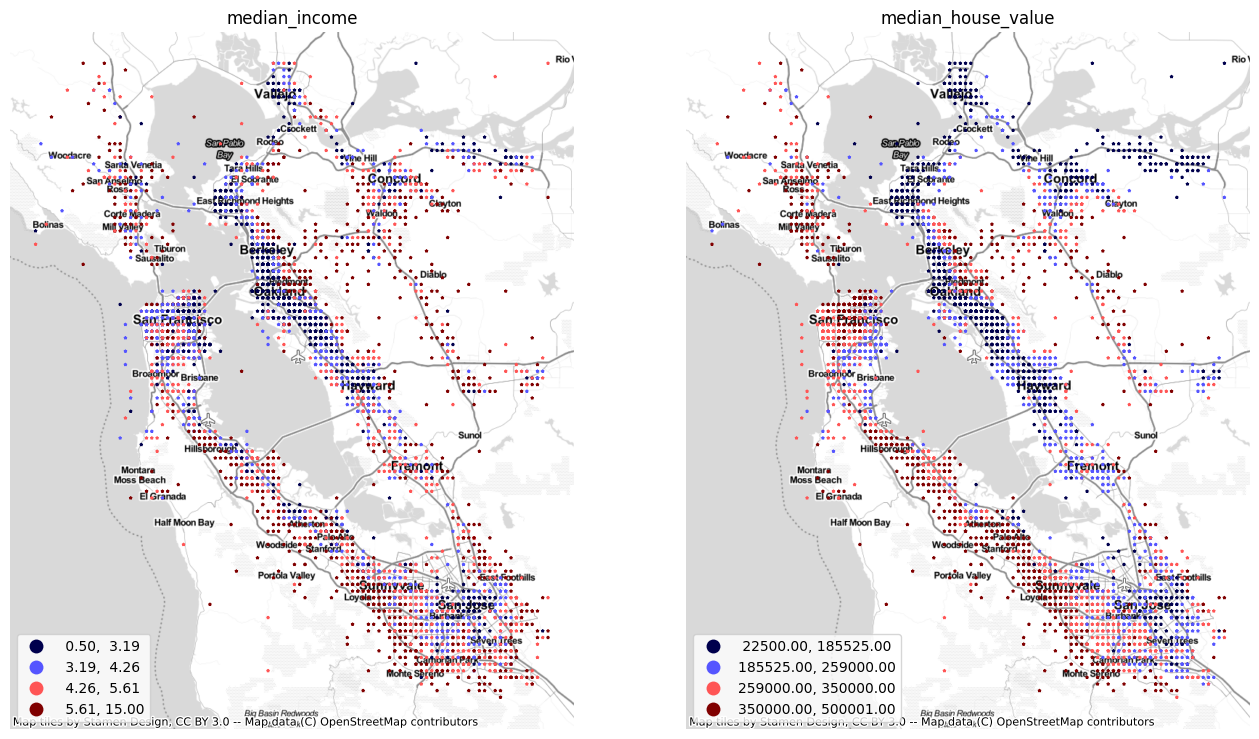

In [ ]:
#@title Zoom In


import contextily as ctx

Left_Map_Variable = "median_income" #@param ['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value', 'ocean_proximity']
Left_Color_Map = "seismic" #@param ['seismic', 'viridis']


Right_Map_Variable = "median_house_value" #@param ['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value']
Right_Color_Map = "seismic" #@param ['seismic', 'viridis']

Number_of_Quantiles = 4 #@param {type:"integer"}

# Define the bounding box
Left_Longitude = -122.71 #@param {type:"number"}
Right_Longitude = -121.74 #@param {type:"number"}
Bottom_Latitude = 37.2 #@param {type:"number"}
Top_Latitude = 38.15 #@param {type:"number"}

bbox = (Left_Longitude, Bottom_Latitude, Right_Longitude, Top_Latitude)

Map_Source = "Stamen Tonerlite" #@param["Stamen Terrain", "Stamen Tonerlite", "OpenStreetMap Mapnik", "OpenTopoMap"]

# Filter the geodataframe to only include rows where the 'latitude' and 'longitude' columns fall within the bounding box
zoomed_gdf = housing_gdf_lat.cx[bbox[0]:bbox[2], bbox[1]:bbox[3]].to_crs(epsg=3857)


#geodataframes have a builtin plotting method that makes it easy to visualize geospatial data

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,11))

if Left_Map_Variable == "ocean_proximity":
  zoomed_gdf.plot(column=Left_Map_Variable, cmap='Paired', markersize=3, marker='*', legend = True, ax=ax1)
  ax1.set_title(Left_Map_Variable)
else:
  zoomed_gdf.plot(column=Left_Map_Variable, cmap=Left_Color_Map, markersize=3, marker='*', legend = True, ax=ax1, scheme = 'quantiles', k = Number_of_Quantiles)
  ax1.set_title(Left_Map_Variable)

ax1.set_axis_off()

ctx.add_basemap(ax1, source = Map_Source)

zoomed_gdf.plot(column=Right_Map_Variable, cmap=Right_Color_Map, markersize=3, marker='*',legend = True, ax=ax2, scheme = 'quantiles', k = Number_of_Quantiles)
ax2.set_title(Right_Map_Variable)

ax2.set_axis_off()

ctx.add_basemap(ax2, source = Map_Source)

In [ ]:
housing_df[#put a variable here]

In [ ]:
#@title Simulate a Two Sample Independent t-test
from scipy.stats import ttest_ind

Sample_1_Ocean_Proximity = 'INLAND' #@param ['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']
Sample_2_Ocean_Proximity = '\u003C1H OCEAN' #@param ['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']

sample_size = 35 #@param {type:"integer"}
Alternative_Hypothesis = 'less' #@param ['less','two-sided', 'greater']

Test_Variable = "median_house_value" #@param ['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value']
Assume_Equal_Variance = False #@param {type:"boolean"}

sample1 = housing_gdf_lat[housing_gdf_lat["ocean_proximity"] == Sample_1_Ocean_Proximity][Test_Variable].sample(n = sample_size)
sample2 = housing_gdf_lat[housing_gdf_lat["ocean_proximity"] == Sample_2_Ocean_Proximity][Test_Variable].sample(n = sample_size)

#means
mean1 = sample1.mean()
mean2 = sample2.mean()

diff = sample1.mean() - sample2.mean()

#t-test
t_statistic, p_value = ttest_ind(sample1, sample2,equal_var = Assume_Equal_Variance)


print(f"Mean {Test_Variable} for Sample of {Sample_1_Ocean_Proximity} neighborhoods: {mean1} \n")
print(f"Mean {Test_Variable} for Sample of {Sample_2_Ocean_Proximity} neighborhoods: {mean2} \n")
print(f"Mean of {Sample_1_Ocean_Proximity} Sample - Mean of {Sample_2_Ocean_Proximity} Sample: {diff}\n")
print(f"t-statistic: {t_statistic}\n")
print(f"p-value: {p_value}")


Mean median_house_value for Sample of INLAND neighborhoods: 122400.0 

Mean median_house_value for Sample of <1H OCEAN neighborhoods: 232894.2857142857 

Mean of INLAND Sample - Mean of <1H OCEAN Sample: -110494.28571428571

t-statistic: -5.600697828121245

p-value: 5.280266139648282e-07
